In [1]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amin(pca_data) - np.amax(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)


Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Empty cluster! Correcting centroids.
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-3605dd134be5>", line 142, in <module>
    kmeans(5, 10)
  File "<ipython-input-1-3605dd134be5>", line 116, in kmeans
    empty_check()
  File "<ipython-input-1-3605dd134be5>", line 81, in empty_check
    empty_check()
  Fi

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt: 

In [2]:
        centroids_array = (np.amin(pca_data) - np.amax(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)


In [3]:
print(centroids_array)


[[-140.0732627  -320.19744897]
 [-206.16202888 -271.1183941 ]
 [-429.74400401 -616.45587104]
 [-532.21911366 -238.80470797]
 [-752.45997461 -640.36738889]]


Empty cluster! Correcting centroids.
Runtime: 0:00:01.328418
kmeans centroids: [[124.11329651 -43.66715622]
 [-21.8603096   45.24895477]
 [-36.46892548 -41.39031219]
 [323.14968872 378.83300781]
 [ 80.26602173 156.78919983]]
Runtime: 0:00:00.108739
sklearnkmeans centroids: [[-21.425686  46.12711 ]
 [174.5415   -25.316422]
 [ 52.14768  -68.0419  ]
 [ 85.9695   173.40834 ]
 [-45.72084  -33.25464 ]]


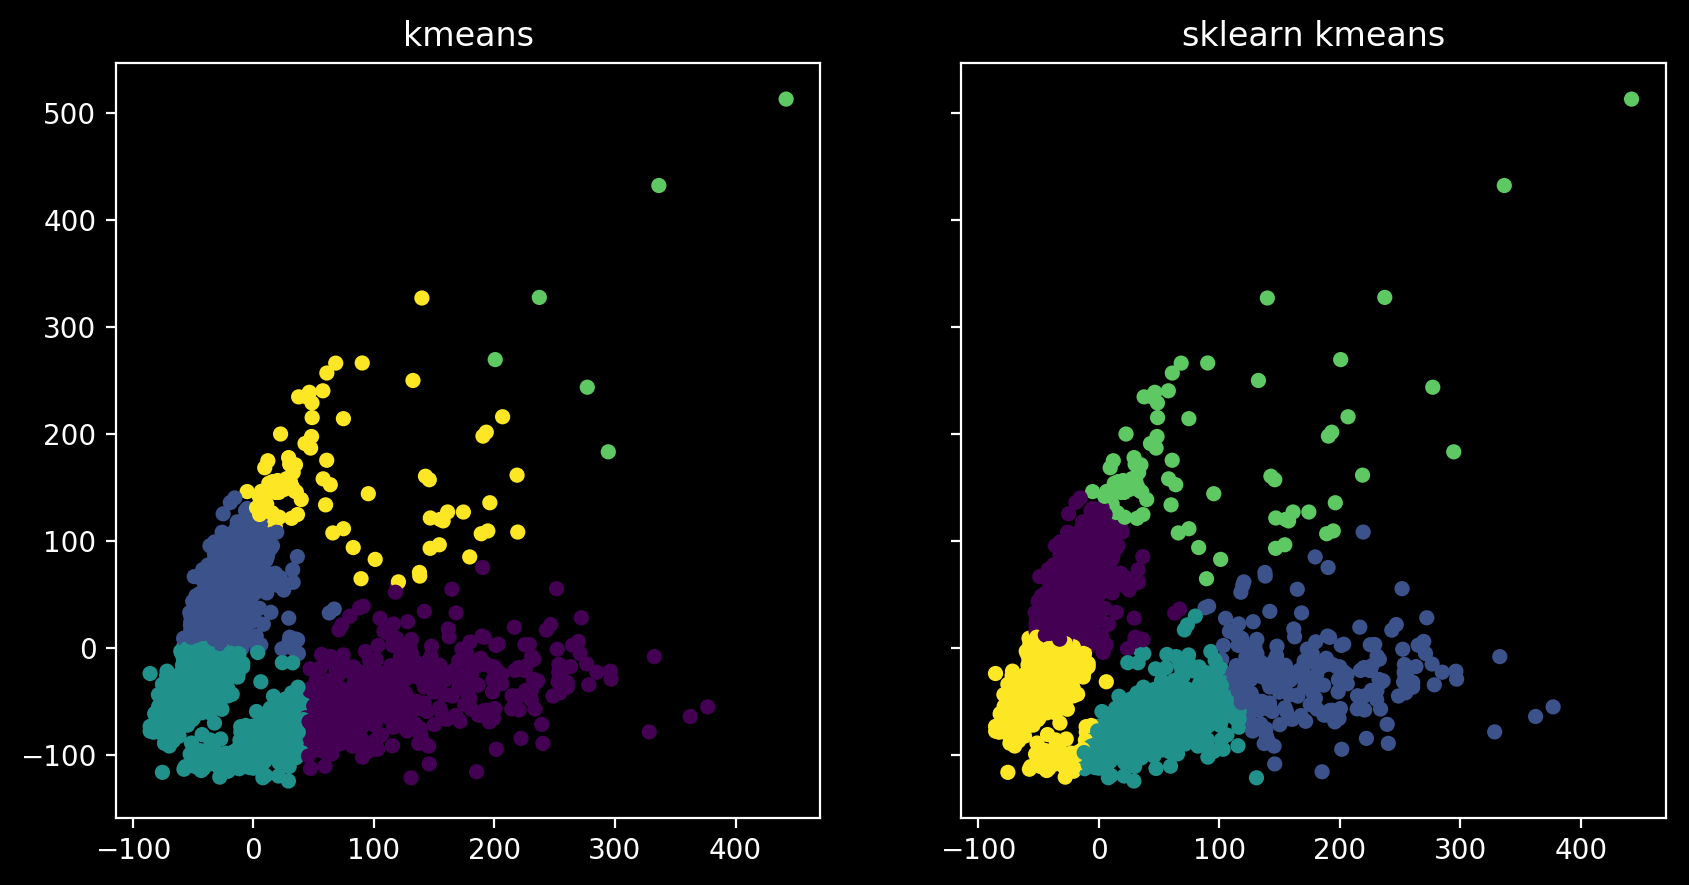

In [4]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amax(pca_data) - np.amin(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)


Runtime: 0:00:01.237688
kmeans centroids: [[ 66.08669281 -61.96974182]
 [143.4682312  219.22299194]
 [189.926651   -18.72477913]
 [-17.34673691  56.73918152]
 [-42.30782318 -28.73684883]]
Runtime: 0:00:00.086758
sklearnkmeans centroids: [[-21.425707  46.127094]
 [174.54156  -25.316391]
 [-45.720844 -33.254642]
 [ 85.9695   173.40833 ]
 [ 52.147724 -68.04187 ]]


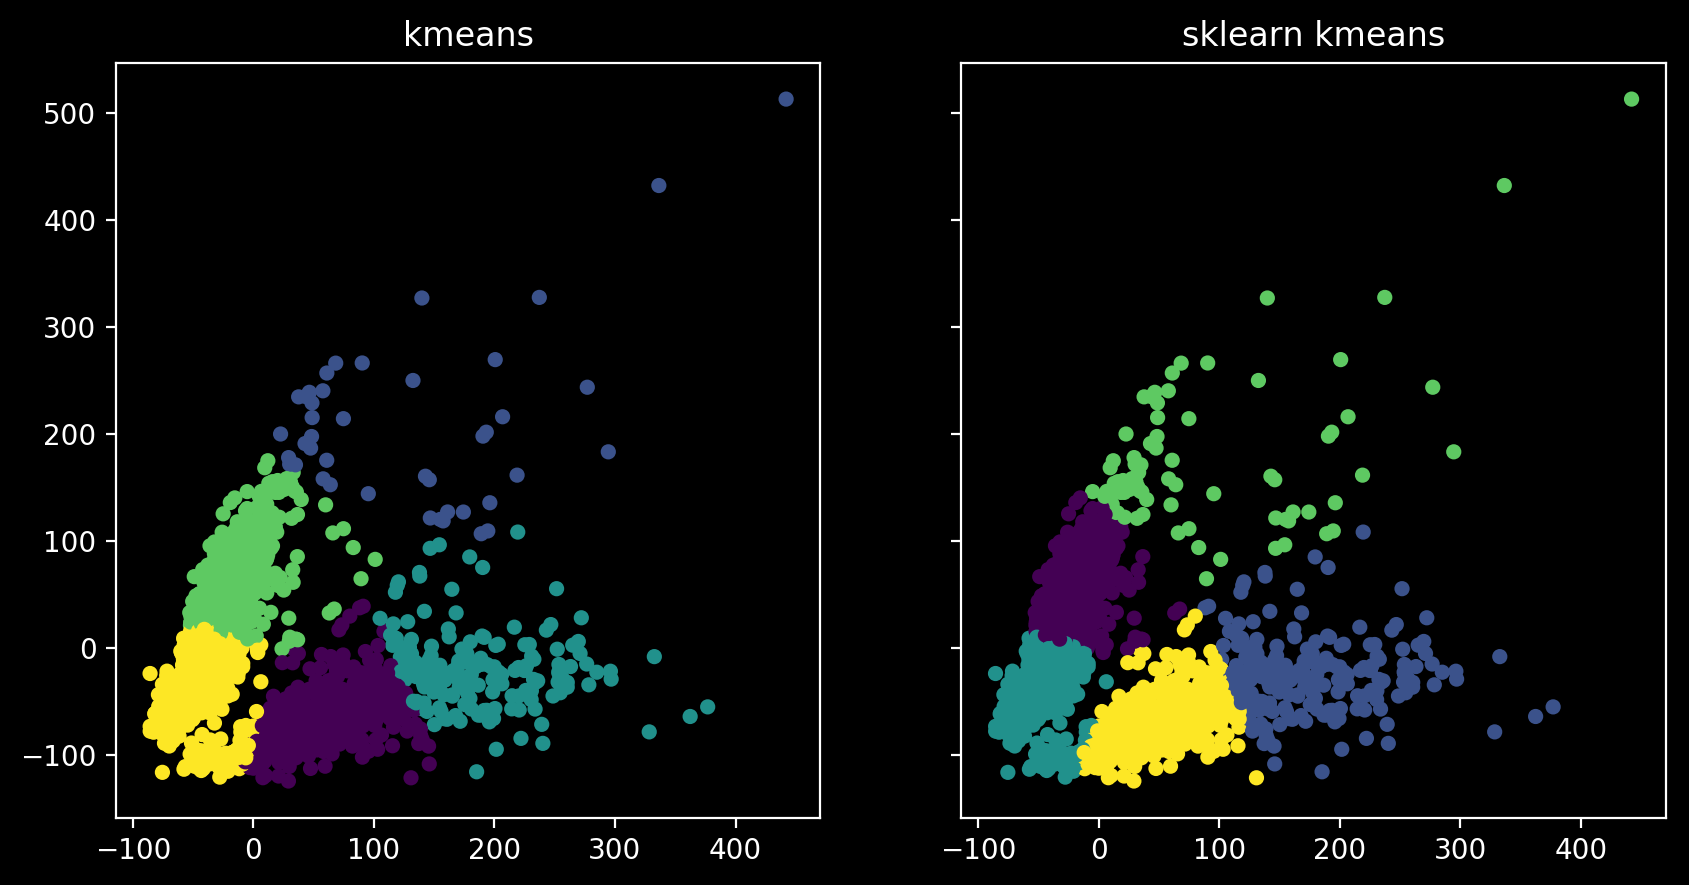

In [5]:
# Import libraries
import numpy as np
import pandas
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import scanpy as sc
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 


# Global Variables
t1 = 0
patients = 0
genes = 0
centroids_array = 0
nearest_centroid = 0
k = 0


# Functions
# Define distance function which takes integer inputs which identify patient and centroid
def runtime_start():
    global t1 
    t1 = datetime.now().time()


def runtime_end():
    t2 = datetime.now().time()
    fmt = '%H:%M:%S.%f'
    elapsed = str(datetime.strptime(str(t2), fmt) - datetime.strptime(str(t1), fmt))
    return str("Runtime: " + elapsed)


def random_start_centroids(starttype):
    # Create Centroid Array by randomly picking k patients from data
    global centroids_array, patients, genes, k
    patients = pca_data.shape[0]
    genes = pca_data.shape[1]
    centroids_array = np.empty([0, genes])

    if starttype == "randpat":
        centroids_numbers = np.random.randint(patients, size=k)
        i = 0
        # Pick random start sample 
        while i < k:
            random_patient = centroids_numbers[i]
            centroids_array = np.append(centroids_array, [pca_data[random_patient, :]], axis=0)
            i += 1

    elif starttype == "randnum":
        centroids_array = (np.amax(pca_data) - np.amin(pca_data))* np.random.random_sample((k, genes)) + np.amin(pca_data)

def assign_centroids():
    global nearest_centroid, patients, k
    # Assign closest Centroid
    # Loop über alle Punkte
    i = 0
    nearest_centroid = np.zeros([patients, 1])    
    while i < patients:
        sml_distance = 0

        # While loop selecting every centroid
        j = 1
        while j <= k:

            if sml_distance == 0 or dist(i, j) < sml_distance:
                sml_distance = dist(i, j)
                nearest_centroid[i, 0] = j
            j += 1
        i += 1

def empty_check():
    # Sicherstellen dass es durch die Zufallscentroids keine leeren Cluster gibt
    i = 0
    while i < k:
        if list(nearest_centroid).count(i+1) == 0:
            print("Empty cluster! Correcting centroids.")
            random_start_centroids("randnum")
            assign_centroids()
            empty_check()
        else:
            pass
        i += 1

def dist(patient_point, cluster_number):
    global centroids_array
    a = pca_data[patient_point, :]
    b = centroids_array[cluster_number-1, :]
    d = np.linalg.norm(a-b)
    return d
    

def new_centroids():
    global centroids_array
    zeros = np.zeros([patients,1])
    centroids_array = np.empty([0, genes])
    #"Masken" um values aus pca_data abzurufen
    nearest_centroidpca1 = np.append(nearest_centroid, zeros, axis=1)
    nearest_centroidpca2 = np.append(zeros, nearest_centroid, axis=1)
    #while loop der für alle k cluster läuft:
    i = 1
    while i <= k:
        pca1 = np.mean(pca_data[nearest_centroidpca1 == i])
        pca2 = np.mean(pca_data[nearest_centroidpca2 == i])
        centroids_array = np.append(centroids_array, [[pca1, pca2]], axis=0)
        i += 1
              

def kmeans(k1, n_iterations):
        global k
        k = k1
        i = 0
        random_start_centroids("randnum")
        assign_centroids()
        empty_check()
        while i<n_iterations:
                new_centroids()
                assign_centroids()
                i+=1


# General Code
# Import data
data = sc.read_10x_mtx('./data/filtered_gene_bc_matrices/hg19/', var_names='gene_symbols', cache=True)


# Filter useless data
sc.pp.filter_genes(data, min_cells=1)
filtered_data = np.array(data._X.todense())


# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(filtered_data)
#print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)


# Execute
runtime_start()
kmeans(5, 10)
print(runtime_end())


# plotting
fig = pyplot.figure(1, figsize=[10,5], dpi = 200)
plt1, plt2 = fig.subplots(1,2, sharex=True, sharey=True)
nearest_centroid_squeeze = np.squeeze(nearest_centroid.astype(int))
plt1.scatter(pca_data[:, 0], pca_data[:, 1], c=nearest_centroid_squeeze, s=20, cmap='viridis')
plt1.set_title('kmeans')
print("kmeans centroids:", centroids_array)


#sklearn comparison
runtime_start()
sklearn_kmeans = KMeans(n_clusters=k).fit(pca_data)
y_sklearnkmeans = sklearn_kmeans.predict(pca_data)
print(runtime_end())
plt2.scatter(pca_data[:, 0], pca_data[:, 1], c=y_sklearnkmeans, s=20, cmap='viridis')
plt2.set_title('sklearn kmeans')
pyplot.show()
print("sklearnkmeans centroids:", sklearn_kmeans.cluster_centers_)
